# Cell 4.4: Explore Your First Dataset (HAM10000)
Explore the HAM10000 skin lesion dataset - our first 2D medical image dataset.

In [1]:
# Cell 1: Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
print("Imports OK")

Imports OK


In [2]:
# Cell 2: Look at what files we have
data_dir = Path("../data/raw/ham10000")

# List all files (show first 20)
all_files = list(data_dir.rglob("*"))
print(f"Total files: {len(all_files)}")
for f in sorted(all_files)[:20]:
    if f.is_file():
        print(f"  {f.relative_to(data_dir)} ({f.stat().st_size / 1024:.0f} KB)")
    else:
        print(f"  {f.relative_to(data_dir)}/ (folder)")

Total files: 10023
  EXTRACT_HERE.txt (1 KB)
  HAM10000_images_part_1/ (folder)
  HAM10000_images_part_1\ISIC_0024306.jpg (273 KB)
  HAM10000_images_part_1\ISIC_0024307.jpg (268 KB)
  HAM10000_images_part_1\ISIC_0024308.jpg (289 KB)
  HAM10000_images_part_1\ISIC_0024309.jpg (272 KB)
  HAM10000_images_part_1\ISIC_0024310.jpg (364 KB)
  HAM10000_images_part_1\ISIC_0024311.jpg (267 KB)
  HAM10000_images_part_1\ISIC_0024312.jpg (252 KB)
  HAM10000_images_part_1\ISIC_0024313.jpg (242 KB)
  HAM10000_images_part_1\ISIC_0024314.jpg (263 KB)
  HAM10000_images_part_1\ISIC_0024315.jpg (296 KB)
  HAM10000_images_part_1\ISIC_0024316.jpg (277 KB)
  HAM10000_images_part_1\ISIC_0024317.jpg (267 KB)
  HAM10000_images_part_1\ISIC_0024318.jpg (291 KB)
  HAM10000_images_part_1\ISIC_0024319.jpg (284 KB)
  HAM10000_images_part_1\ISIC_0024320.jpg (312 KB)
  HAM10000_images_part_1\ISIC_0024321.jpg (265 KB)
  HAM10000_images_part_1\ISIC_0024322.jpg (324 KB)
  HAM10000_images_part_1\ISIC_0024323.jpg (274 KB)


In [3]:
# Cell 3: Load and look at the metadata CSV
metadata = pd.read_csv(data_dir / "HAM10000_metadata.csv")
print(f"Shape: {metadata.shape}")
print(f"\nColumns: {list(metadata.columns)}")
print(f"\nFirst 5 rows:")
metadata.head()

Shape: (10015, 7)

Columns: ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']

First 5 rows:


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


Disease Distribution:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


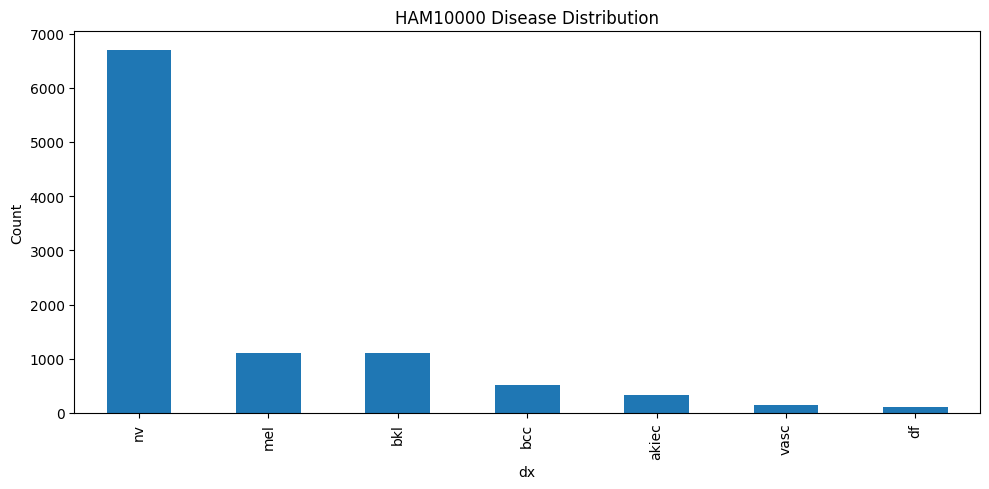

In [4]:
# Cell 4: What types of skin conditions are in this dataset?
print("Disease Distribution:")
print(metadata['dx'].value_counts())

# Plot it
metadata['dx'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("HAM10000 Disease Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

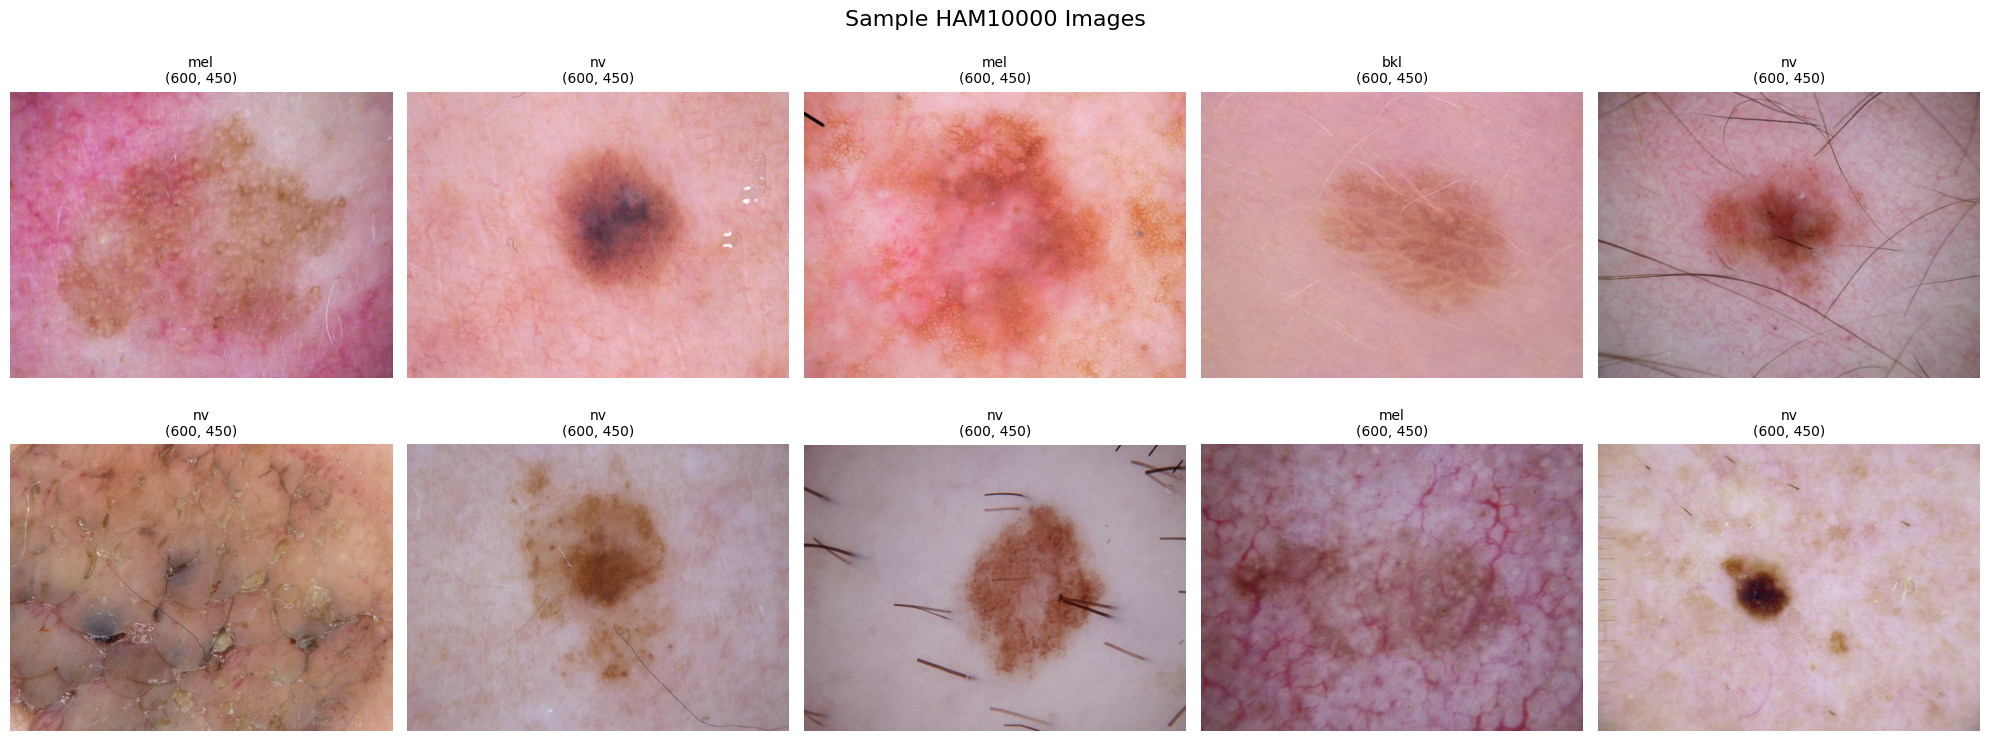

In [5]:
# Cell 5: Look at some actual images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, (_, row) in enumerate(metadata.sample(10, random_state=42).iterrows()):
    # Find the image file
    image_id = row['image_id']
    # HAM10000 images might be in different folders - search for them
    img_files = list(data_dir.rglob(f"{image_id}.jpg"))
    if img_files:
        img = Image.open(img_files[0])
        axes[i].imshow(img)
        axes[i].set_title(f"{row['dx']}\n{img.size}", fontsize=10)
    axes[i].axis('off')

plt.suptitle("Sample HAM10000 Images", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Cell 6: Check image properties
from collections import Counter

sizes = []
for img_path in list(data_dir.rglob("*.jpg"))[:100]:  # Check first 100
    with Image.open(img_path) as img:
        sizes.append(img.size)

size_counts = Counter(sizes)
print("Image sizes found:")
for size, count in size_counts.most_common():
    print(f"  {size}: {count} images")

Image sizes found:
  (600, 450): 100 images
